In [2]:
import sys
import os
sys.path.append('ADD YOUR PATH HERE')

In [39]:
# Basic Imports
import pandas as pd
import numpy as np
import random
import tensorflow as tf

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#importing other libraries
import plotly.express as px
import seaborn as sns
import itertools
from glob import glob
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

In [6]:
img_dir = 'ADD YOUR PATH HERE/Image_classification_data/patch_images/'
csv_dir = 'ADD YOUR PATH HERE/Image_classification_data/'

In [7]:
filename1 = 'data_labels_mainData.csv'
filename2 = 'data_labels_extraData.csv'

file_path1 = os.path.join(csv_dir, filename1)
file_path2 = os.path.join(csv_dir, filename2)

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

In [8]:
print(df1)

      InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0          22405          1  22405.png   fibroblast         0            0
1          22406          1  22406.png   fibroblast         0            0
2          22407          1  22407.png   fibroblast         0            0
3          22408          1  22408.png   fibroblast         0            0
4          22409          1  22409.png   fibroblast         0            0
...          ...        ...        ...          ...       ...          ...
9891        1625         60   1625.png   epithelial         2            1
9892        1626         60   1626.png   epithelial         2            1
9893        1627         60   1627.png   epithelial         2            1
9894        1628         60   1628.png   epithelial         2            1
9895        1629         60   1629.png   epithelial         2            1

[9896 rows x 6 columns]


In [9]:
print(df2)

       InstanceID  patientID  ImageName  isCancerous
0           12681         61  12681.png            0
1           12682         61  12682.png            0
2           12683         61  12683.png            0
3           12684         61  12684.png            0
4           12685         61  12685.png            0
...           ...        ...        ...          ...
10379       20028         99  20028.png            0
10380       20029         99  20029.png            0
10381       20030         99  20030.png            0
10382       20031         99  20031.png            0
10383       20032         99  20032.png            0

[10384 rows x 4 columns]


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


In [13]:
df1.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


In [17]:
df1.isna().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

  # Exploratory Data Analysis (EDA)  
  
First introduced by American mathematician John Tukey in the 1970s, to this day scientists utilize EDA to study and summarize large amounts of data, frequently using techniques for data visualization. This gives the data scientists the ability to find patterns, identify anomalies or test a hypothesis by determining the most efficient way to alter data sources to obtain the solutions.  

EDA can assist in determining whether the statistical methods you are thinking about using for data analysis are appropriate and EDAs main purpose is to discover what data might reveal beyond formal modeling or hypothesis testing tasks and offers a better comprehension of the variables in the data set. EDA approaches are still a frequently employed tool in the data discovery process today. 

Text(0.5, 1.0, 'Distribution of Cancer Cells Types in Images')

<Figure size 700x700 with 0 Axes>

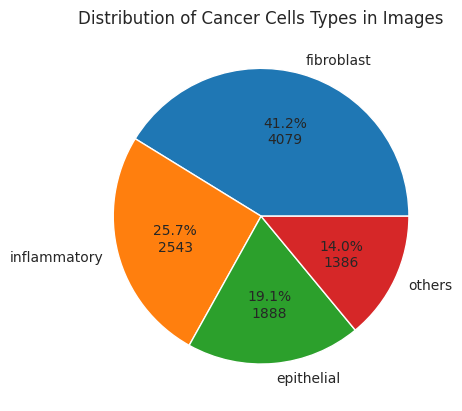

In [50]:
total = df1['cellTypeName'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.figure(figsize=(7, 7))
plt.figure()
plt.pie(df1['cellTypeName'].value_counts().values,labels=['fibroblast', 'inflammatory', 'epithelial', 'others'], autopct=fmt)
plt.title('Distribution of Cancer Cells Types in Images')

Text(0.5, 1.0, 'Distribution of Cancer Cells in Main Data')

<Figure size 700x700 with 0 Axes>

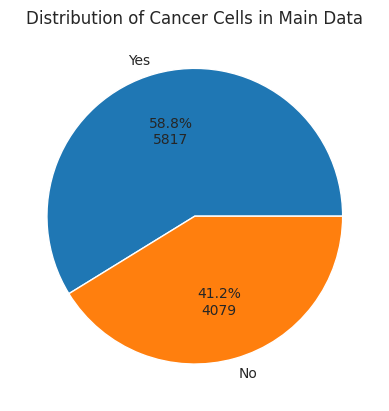

In [59]:
total = df1['isCancerous'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.figure(figsize=(7, 7))
plt.figure()
plt.pie(df1['isCancerous'].value_counts().values,labels=['Yes', 'No'], autopct=fmt)
plt.title('Distribution of Cancer Cells in Main Data')

Text(0.5, 1.0, 'Distribution of Cancer Cells in Extra Data')

<Figure size 700x700 with 0 Axes>

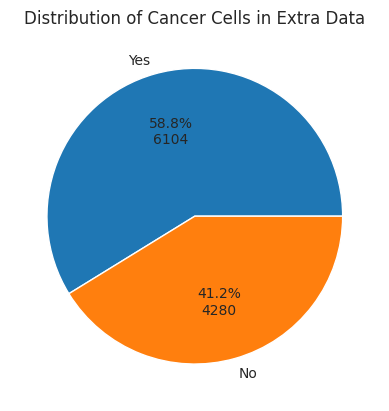

In [60]:
total = df2['isCancerous'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.figure(figsize=(7, 7))
plt.figure()
plt.pie(df1['isCancerous'].value_counts().values,labels=['Yes', 'No'], autopct=fmt)
plt.title('Distribution of Cancer Cells in Extra Data')

# Pre Processing

In [40]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

<ipython-input-40-0e409faed625>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()
<ipython-input-40-0e409faed625>:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)


,InstanceID,patientID,cellType,isCancerous
InstanceID,1.0000,0.0448,-0.2192,-0.4362
patientID,0.0448,1.0000,0.0880,-0.0012
cellType,-0.2192,0.0880,1.0000,0.4372
isCancerous,-0.4362,-0.0012,0.4372,1.0000


In [63]:
def plotCorrelationMatrix(df, graphWidth):

    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Main data', fontsize=15)
    plt.show()

<ipython-input-63-a70382a72fb7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<ipython-input-63-a70382a72fb7>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


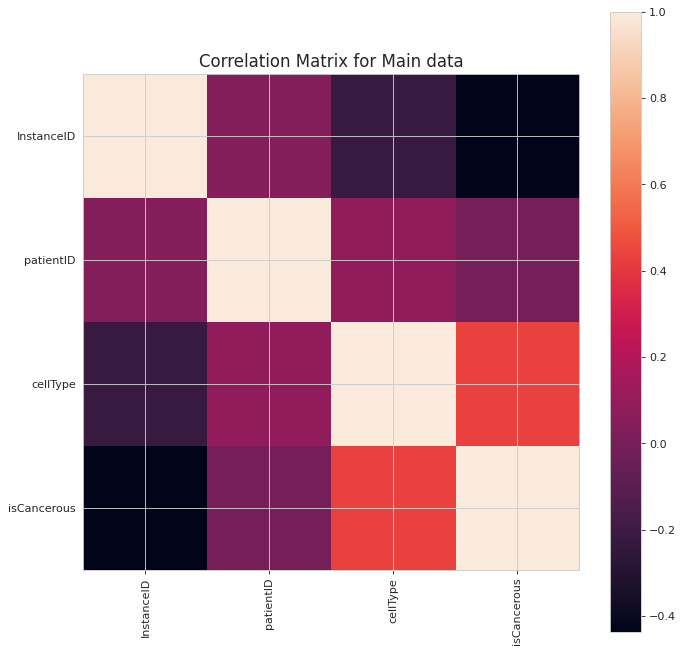

In [64]:
plotCorrelationMatrix(df1, 10)

In [65]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

<ipython-input-65-d59027bddf82>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()
<ipython-input-65-d59027bddf82>:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)


,InstanceID,patientID,isCancerous
InstanceID,1.0000,0.4196,-0.3454
patientID,0.4196,1.0000,-0.3720
isCancerous,-0.3454,-0.3720,1.0000


In [66]:
def plotCorrelationMatrix(df, graphWidth):

    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Extra Data', fontsize=15)
    plt.show()

<ipython-input-66-9f48a53444ce>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<ipython-input-66-9f48a53444ce>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


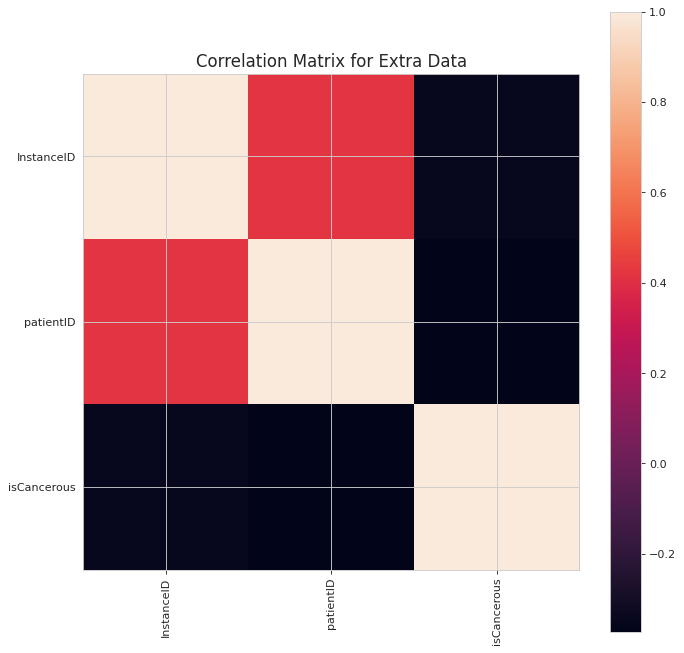

In [67]:
plotCorrelationMatrix(df2, 10)